<a href="https://colab.research.google.com/github/Udhay2898/Pandas_Tutorial_Code/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


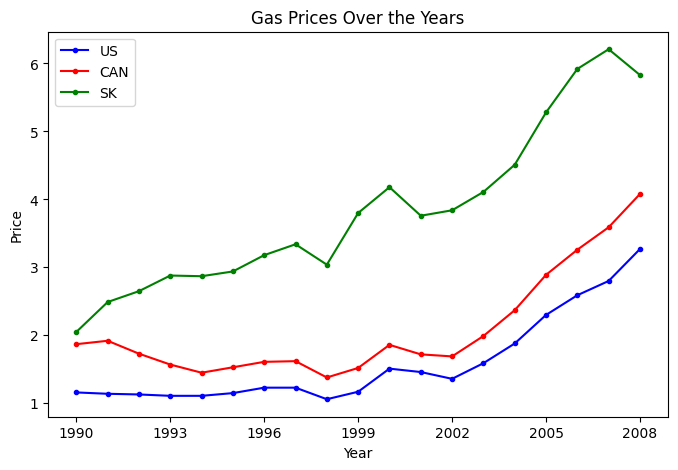

In [85]:
gas = pd.read_csv("/content/drive/MyDrive/Data Sets/gas_prices.csv")
gas.head()

plt.figure(figsize=(8,5))

plt.title('Gas Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')


plt.plot(gas.Year,gas.USA,'b.-',label = 'US')
plt.plot(gas.Year,gas.Canada,'r.-',label = 'CAN')
plt.plot(gas['Year'],gas['South Korea'],'g.-',label = 'SK')

plt.xticks(gas.Year[::3])


plt.legend()

plt.show()

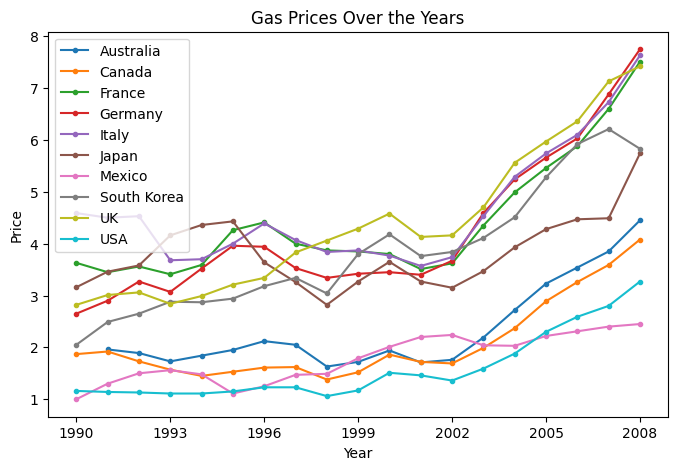

In [82]:
gas = pd.read_csv("/content/drive/MyDrive/Data Sets/gas_prices.csv")
gas.head()

plt.figure(figsize=(8,5))

plt.title('Gas Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')


for i in gas:
  if i  != 'Year':
    plt.plot(gas.Year,gas[i],marker ='.',label = i)

plt.xticks(gas.Year[::3])


plt.legend()

plt.show()